In [80]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [81]:
import pandas_datareader as pdr

Pandas datareader:used to access the public financial data from the internet and import it into 
python as a DataFrame

In [82]:
df=pdr.DataReader("AMZN","yahoo", start='2005-04-05', end='2022-06-05')

In [83]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-04-04,1.7590,1.6905,1.7000,1.750,146844000,1.750
2005-04-05,1.7670,1.7495,1.7615,1.764,98660000,1.764
2005-04-06,1.7600,1.7310,1.7550,1.741,105522000,1.741
2005-04-07,1.7460,1.7250,1.7340,1.745,76146000,1.745
2005-04-08,1.7465,1.7285,1.7375,1.730,60260000,1.730


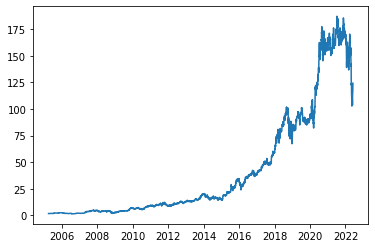

In [84]:
plt.plot(df['Open'])

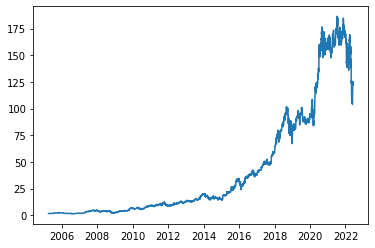

In [85]:
plt.plot(df['Close'])

In [86]:
df.shape

(4324, 6)

In [87]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [88]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4324.000000,4324.000000,4324.000000,4324.000000,4.324000e+03,4324.000000
mean,42.133630,41.156866,41.672494,41.654590,1.115269e+08,41.654590
std,52.328629,51.088523,51.749466,51.702590,9.277685e+07,51.702590
min,1.315000,1.288000,1.304500,1.303500,1.762600e+07,1.303500
25%,4.554000,4.425000,4.490125,4.492500,6.249900e+07,4.492500
50%,15.313750,15.011000,15.197500,15.193500,8.998200e+07,15.193500
75%,72.480001,69.360252,71.309628,71.001127,1.318690e+08,71.001127
max,188.654007,184.839493,187.199997,186.570496,2.086584e+09,186.570496


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4324 entries, 2005-04-04 to 2022-06-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4324 non-null   float64
 1   Low        4324 non-null   float64
 2   Open       4324 non-null   float64
 3   Close      4324 non-null   float64
 4   Volume     4324 non-null   int64  
 5   Adj Close  4324 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 236.5 KB


In [90]:
trainrows=df.iloc[:3000]
testrows=df.iloc[3000:]

In [91]:
window_size=40
xtrain=[]
ytrain=[]

In [92]:
range(len(trainrows)-window_size)

range(0, 2960)

In [93]:
len(trainrows)

3000

In [94]:
trainrows=trainrows['Close'].tolist()
trainrows

[1.75,
 1.7640000581741333,
 1.7410000562667847,
 1.7450000047683716,
 1.7300000190734863,
 1.7300000190734863,
 1.7315000295639038,
 1.715000033378601,
 1.6985000371932983,
 1.6510000228881836,
 1.649999976158142,
 1.6390000581741333,
 1.662500023841858,
 1.6864999532699585,
 1.6519999504089355,
 1.6764999628067017,
 1.6354999542236328,
 1.5859999656677246,
 1.6260000467300415,
 1.6180000305175781,
 1.6549999713897705,
 1.6605000495910645,
 1.6979999542236328,
 1.6979999542236328,
 1.7259999513626099,
 1.7319999933242798,
 1.7115000486373901,
 1.690999984741211,
 1.6924999952316284,
 1.6950000524520874,
 1.7269999980926514,
 1.7365000247955322,
 1.7664999961853027,
 1.7795000076293945,
 1.774999976158142,
 1.784000039100647,
 1.7769999504089355,
 1.7625000476837158,
 1.7725000381469727,
 1.774999976158142,
 1.7755000591278076,
 1.8250000476837158,
 1.8205000162124634,
 1.7795000076293945,
 1.7884999513626099,
 1.7675000429153442,
 1.7415000200271606,
 1.7599999904632568,
 1.7474999427

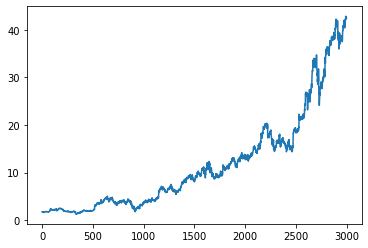

In [95]:
plt.plot(trainrows)

In [96]:
for i in range(len(trainrows)-window_size):
    xtrain.append(trainrows[i:i+window_size])
    ytrain.append(trainrows[i+window_size])

In [97]:
xtrain=np.array(xtrain)

In [98]:
xtrain

array([[ 1.75      ,  1.76400006,  1.74100006, ...,  1.76250005,
         1.77250004,  1.77499998],
       [ 1.76400006,  1.74100006,  1.745     , ...,  1.77250004,
         1.77499998,  1.77550006],
       [ 1.74100006,  1.745     ,  1.73000002, ...,  1.77499998,
         1.77550006,  1.82500005],
       ...,
       [38.25749969, 37.49349976, 37.68349838, ..., 42.60950089,
        42.26200104, 42.43199921],
       [37.49349976, 37.68349838, 37.85900116, ..., 42.26200104,
        42.43199921, 42.2519989 ],
       [37.68349838, 37.85900116, 39.02249908, ..., 42.43199921,
        42.2519989 , 42.65399933]])

In [99]:
ytrain

[1.7755000591278076,
 1.8250000476837158,
 1.8205000162124634,
 1.7795000076293945,
 1.7884999513626099,
 1.7675000429153442,
 1.7415000200271606,
 1.7599999904632568,
 1.747499942779541,
 1.743499994277954,
 1.7519999742507935,
 1.7619999647140503,
 1.7790000438690186,
 1.7654999494552612,
 1.784500002861023,
 1.7690000534057617,
 1.7610000371932983,
 1.7714999914169312,
 1.7510000467300415,
 1.725000023841858,
 1.6855000257492065,
 1.6675000190734863,
 1.6545000076293945,
 1.6454999446868896,
 1.7039999961853027,
 1.7029999494552612,
 1.6979999542236328,
 1.7369999885559082,
 1.7795000076293945,
 1.815500020980835,
 1.8255000114440918,
 1.8595000505447388,
 1.8574999570846558,
 1.8595000505447388,
 1.9084999561309814,
 1.9084999561309814,
 1.8975000381469727,
 1.8975000381469727,
 1.8975000381469727,
 1.8869999647140503,
 2.182499885559082,
 2.2839999198913574,
 2.257499933242798,
 2.246500015258789,
 2.325500011444092,
 2.305500030517578,
 2.2730000019073486,
 2.2634999752044678,
 2

In [100]:
testrows=testrows['Close'].tolist()
testrows

[42.49399948120117,
 42.330501556396484,
 42.30099868774414,
 42.525001525878906,
 42.650001525878906,
 42.62300109863281,
 42.72949981689453,
 42.62649917602539,
 42.64849853515625,
 42.67100143432617,
 42.615501403808594,
 42.8484992980957,
 42.15999984741211,
 42.40299987792969,
 42.36899948120117,
 42.28049850463867,
 42.340999603271484,
 42.79999923706055,
 43.715999603271484,
 43.81700134277344,
 44.32699966430664,
 44.57550048828125,
 45.34149932861328,
 45.4640007019043,
 44.91400146484375,
 44.74399948120117,
 45.35200119018555,
 45.11800003051758,
 44.811500549316406,
 44.23350143432617,
 45.0994987487793,
 45.18899917602539,
 44.959999084472656,
 45.10300064086914,
 44.92649841308594,
 45.37049865722656,
 45.38100051879883,
 45.464500427246094,
 45.91899871826172,
 46.2495002746582,
 47.4114990234375,
 47.34700012207031,
 47.05149841308594,
 46.87649917602539,
 46.70750045776367,
 47.45199966430664,
 47.64099884033203,
 47.4474983215332,
 47.38100051879883,
 48.0675010681152

In [106]:
xtest=[]
ytest=[]
for i in range(len(testrows)-window_size):
    xtest.append(testrows[i:i+window_size])
    ytest.append(testrows[i+window_size])
xtest=np.array(xtest)

In [107]:
xtest

array([[ 42.49399948,  42.33050156,  42.30099869, ...,  45.46450043,
         45.91899872,  46.24950027],
       [ 42.33050156,  42.30099869,  42.52500153, ...,  45.91899872,
         46.24950027,  47.41149902],
       [ 42.30099869,  42.52500153,  42.65000153, ...,  46.24950027,
         47.41149902,  47.34700012],
       ...,
       [168.34649658, 164.05499268, 158.7559967 , ..., 111.07749939,
        115.14649963, 120.20950317],
       [164.05499268, 158.7559967 , 157.78450012, ..., 115.14649963,
        120.20950317, 121.68399811],
       [158.7559967 , 157.78450012, 154.460495  , ..., 120.20950317,
        121.68399811, 125.51100159]])

In [108]:
ytest

[47.4114990234375,
 47.34700012207031,
 47.05149841308594,
 46.87649917602539,
 46.70750045776367,
 47.45199966430664,
 47.64099884033203,
 47.4474983215332,
 47.38100051879883,
 48.067501068115234,
 47.89849853515625,
 48.30350112915039,
 47.237998962402344,
 47.92449951171875,
 47.992000579833984,
 48.53350067138672,
 48.57699966430664,
 49.01750183105469,
 49.66899871826172,
 49.78900146484375,
 49.834999084472656,
 49.73099899291992,
 49.79750061035156,
 50.33649826049805,
 50.56700134277344,
 50.150001525878906,
 50.503501892089844,
 50.51350021362305,
 48.91550064086914,
 48.24549865722656,
 49.03950119018555,
 48.82350158691406,
 48.208499908447266,
 49.385501861572266,
 49.75849914550781,
 49.62950134277344,
 50.11149978637695,
 50.064998626708984,
 50.1870002746582,
 49.69900131225586,
 48.8390007019043,
 49.51649856567383,
 48.79650115966797,
 48.400001525878906,
 47.68299865722656,
 48.56999969482422,
 48.25699996948242,
 48.9379997253418,
 49.82350158691406,
 49.70650100708

In [109]:
xtrain.shape

(2960, 40)

In [113]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD

In [115]:
model=Sequential([
    SimpleRNN(100,input_shape=(window_size,1),return_sequences=True),
    SimpleRNN(10),
    Dense(100,activation='relu'),
    Dense(1,activation='relu')
              
]
)

In [116]:
train=model.compile(loss=MeanAbsoluteError(),optimizer=SGD(),metrics=['mae'])

In [118]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 40, 100)           10200     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10)                1110      
                                                                 
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 12,511
Trainable params: 12,511
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.fit(xtrain.tolist(),ytrain,epochs=50,batch_size=32)

Epoch 1/50
93/93 [==============================] - 4s 20ms/step - loss: 6.2773 - mae: 6.2773
Epoch 2/50
93/93 [==============================] - 2s 19ms/step - loss: 2.2819 - mae: 2.2819
Epoch 3/50
93/93 [==============================] - 2s 19ms/step - loss: 1.4199 - mae: 1.4199
Epoch 4/50
93/93 [==============================] - 2s 19ms/step - loss: 1.2369 - mae: 1.2369
Epoch 5/50
93/93 [==============================] - 2s 19ms/step - loss: 1.1161 - mae: 1.1161
Epoch 6/50
93/93 [==============================] - 2s 19ms/step - loss: 0.9375 - mae: 0.9375
Epoch 7/50
93/93 [==============================] - 2s 20ms/step - loss: 0.8741 - mae: 0.8741
Epoch 8/50
93/93 [==============================] - 2s 21ms/step - loss: 0.8698 - mae: 0.8698
Epoch 9/50
93/93 [==============================] - 2s 20ms/step - loss: 0.8050 - mae: 0.8050
Epoch 10/50
93/93 [==============================] - 2s 19ms/step - loss: 0.7351 - mae: 0.7351
Epoch 11/50
93/93 [==============================] - 2s 19m